### Scatter plot

In [2]:
%matplotlib inline

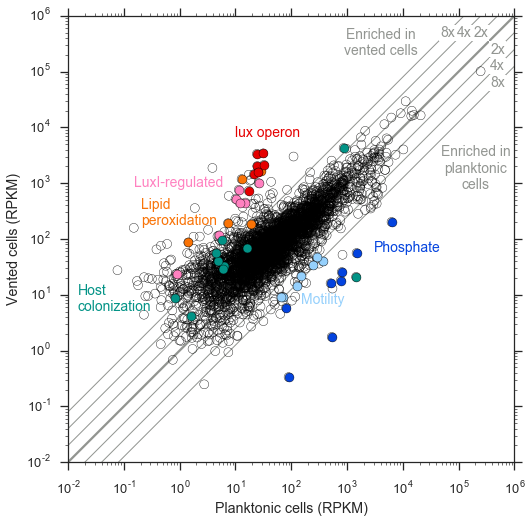

In [5]:
# vibrio_plot_scatter.py

# ### Function imports

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sys import argv
import ast
from matplotlib import rc

# activate latex text rendering
#rc('text', usetex=True)

# ### Specify what to plot
# 
# * Pairwise comparison (xvar, yvar)
# * List of genes to highlight (gene_list)
# * Highlight color (gene_color)
# * Labels on or off (gene_labels)

xaxis = 'Plk' # argv[1]
yaxis = 'Vnt' # argv[2]
xlabel = 'Planktonic cells (RPKM)' # argv[3]
ylabel = 'Vented cells (RPKM)' #  argv[4]
axis_limits = [1e-2, 1e6, 1e-2, 1e6]

pathway_csv = 'Phosphate,Flagellar,LipidPerox,LuxOperon,LuxIregulated,HostColonization' # argv[5]

gene_dict = {
    'Phosphate': ['VF_A1087', 'VF_A1090', 'VF_1611', 'VF_A1057', 'VF_1610', 'VF_1613', 'VF_1612', 'VF_A1089'],
    'Flagellar': ['VF_1851', 'VF_2079', 'VF_1842', 'VF_2317', 'VF_1843', 'VF_1863', 'VF_1841'],
    'LipidPerox': ['VF_1081', 'VF_1082', 'VF_1083', 'VF_A1049', 'VF_A1050'],
    'LuxOperon': ['VF_A0918', 'VF_A0919', 'VF_A0920', 'VF_A0924', 'VF_A0921', 'VF_A0922', 'VF_A0923', 'VF_A0924'],
    'LuxIregulated': ['VF_A0985', 'VF_1161', 'VF_1162', 'VF_1725', 'VF_A0090', 'VF_A0622', 'VF_A1058'],
    'HostColonization': ['VF_0475', 'VF_A0487', 'VF_A0875', 'VF_A0874', 'VF_A0872', 'VF_A0870', 'VF_A0867', 'VF_A0866', 'VF_A0868', 'VF_A0869'],
    #'GGDEFdomain': ['VF_A0879', 'VF_A0343', 'VF_A0342', 'VF_A0476'],

    'TMAOreductase': ['VF_A0188', 'VF_A0189'],
    'FatCatabolism': ['VF_0533'],
    'AminoAcid': ['VF_1585', 'VF_1586', 'VF_A0840'],
    'PTSsugars': ['VF_A0747', 'VF_A1189', 'VF_A0941', 'VF_A0942'],
    'NonPTSsugars': ['VF_A0799']
    }

coords_dict = {
    'Phosphate': [3e3, 7e1],
    'Flagellar': [1.5e2, 8e0],
    'LipidPerox': [2e-1, 2.9e2],
    'LuxOperon': [1e1, 8e3],
    'LuxIregulated': [1.5e-1, 1e3],
    'HostColonization': [1.5e-2, 8.5e0],

    'TMAOreductase': [1e1, 1e4],
    'FatCatabolism': [1e1, 1e4],
    'AminoAcid': [1e1, 1e4],
    'PTSsugars': [1e1, 1e4],
    'NonPTSsugars': [1e1, 1e4]
}

name_dict = {
    'Phosphate': 'Phosphate',
    'Flagellar': 'Motility',
    'LipidPerox': 'Lipid\nperoxidation',
    'LuxOperon': 'lux operon',
    'LuxIregulated': 'LuxI-regulated',
    'HostColonization': 'Host\ncolonization',

    'TMAOreductase': 'TMAO reductase',
    'FatCatabolism': 'Fat catabolism',
    'AminoAcid': 'Amino acids',
    'PTSsugars': 'PTS sugars',
    'NonPTSsugars': 'Non-PTS sugars'
}

name_lookup = {
    'Plk': 'planktonic',
    'Swt': 'SWT',
    'Vnt': 'vented'
}

# colors from http://xkcd.com/color/rgb/
# pathway colors
color_csv = 'blue,light blue,orange,red,pink,teal' # argv[6]
# xy line colors
unity_color = sns.xkcd_rgb['grey']
xy_color_dict = {'Plk': sns.xkcd_rgb['grey'],
                 'Swt': sns.xkcd_rgb['grey'],
                 'Vnt': sns.xkcd_rgb['grey']} 
# xy_color_dict = {'Plk': sns.xkcd_rgb['medium blue'],
#                  'Swt': sns.xkcd_rgb['light red'],
#                  'Vnt': sns.xkcd_rgb['medium green']} 

gene_labels = 'False' # argv[7]
gene_labels = ast.literal_eval(gene_labels)

# ### Import data

path = '/Users/luke/vibrio/results/results_rpkm.csv' # argv[8]

df = pd.read_csv(path, index_col=0)


# ### Plot formatting

# Seaborn style and context
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# Helvetica font with Latex -- commented out because log labels come out in serif font
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
# rcParams['text.usetex'] = True


# ### Scatter plot

# specify column names
xvar = xaxis + '_rpkm_mean'
yvar = yaxis + '_rpkm_mean'

# specify reference lines
x = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
x_pos3 = [a * 8.0 for a in x]
x_pos2 = [a * 4.0 for a in x]
x_pos1 = [a * 2.0 for a in x]
x_neg3 = [a * 0.125 for a in x]
x_neg2 = [a * 0.250 for a in x]
x_neg1 = [a * 0.500 for a in x]

# reference lines and labels for log2fc = -3, -2, -1, 0, 1, 2, 3
# (identified DEGs as p-value < 0.001 and log2FoldChange > 3.0)
fig = plt.figure(figsize=(8,8))
plt.plot(x, x, zorder=0, color=unity_color)
plt.plot(x, x_pos3, zorder=0, color=xy_color_dict[yaxis], linewidth=1)
plt.plot(x, x_pos2, zorder=0, color=xy_color_dict[yaxis], linewidth=1)
plt.plot(x, x_pos1, zorder=0, color=xy_color_dict[yaxis], linewidth=1)
plt.plot(x, x_neg3, zorder=0, color=xy_color_dict[xaxis], linewidth=1)
plt.plot(x, x_neg2, zorder=0, color=xy_color_dict[xaxis], linewidth=1)
plt.plot(x, x_neg1, zorder=0, color=xy_color_dict[xaxis], linewidth=1)
plt.text(4e3, 2e5, 'Enriched in\n%s cells' % name_lookup[yaxis], fontsize=14, horizontalalignment='center', color=xy_color_dict[yaxis])
plt.text(5e5*0.125, 5e5, '8x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[yaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})
plt.text(5e5*0.250, 5e5, '4x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[yaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})
plt.text(5e5*0.500, 5e5, '2x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[yaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})
plt.text(2e5, 8e2, 'Enriched in\n%s\ncells' % name_lookup[xaxis], fontsize=14, horizontalalignment='center', color=xy_color_dict[xaxis])
plt.text(5e5, 5e5*0.125, '8x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[xaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})
plt.text(5e5, 5e5*0.250, '4x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[xaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})
plt.text(5e5, 5e5*0.500, '2x', fontsize=14, horizontalalignment='center', verticalalignment='center', color=xy_color_dict[xaxis], bbox={'facecolor':'white', 'edgecolor':'none', 'pad':1})

# main plot
plt.scatter(df[xvar], df[yvar], s=80, edgecolor='black', facecolor='none')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.axis(axis_limits)

# highlight genes
pathway_list = pathway_csv.split(',')
pathway_color = color_csv.split(',')
for i in range(len(pathway_list)):
    # get VF list from pathway
    gene_list = gene_dict[pathway_list[i]]
    # gene colors
    gene_color = sns.xkcd_rgb[pathway_color[i]]
    # plot genes in pathway
    plt.scatter(df[xvar][gene_list], df[yvar][gene_list], s=80, edgecolor='black', facecolor=gene_color)
    # add gene labels if requested
    if gene_labels:
        labels_string = 'labels'
        for gene in gene_list:
            plt.text(df[xvar][gene], df[yvar][gene], gene)
    else:
        labels_string = 'nolabels'
    # add pathway labels
    coords_list = coords_dict[pathway_list[i]]
    plt.text(coords_list[0], coords_list[1], name_dict[pathway_list[i]], fontsize=14, color=sns.xkcd_rgb[pathway_color[i]], horizontalalignment='left', verticalalignment='center')
                
# save pdf
gene_set = '_'.join(pathway_list)
plt.savefig('%s_%s_%s_%s.pdf' % (xaxis, yaxis, gene_set, labels_string))
